# Load packages and set up variables

In [1]:
if (!require("psych")) rhumba::install("r-psych")
if (!require("dplyr")) rhumba::install("r-dplyr")
if (!require("ggplot2")) rhumba::install("r-ggplot2")
if (!require("car")) rhumba::install("r-car")
if (!require("janitor")) rhumba::install("r-janitor")
if (!require("readxl")) rhumba::install("r-readxl")
if (!require("remotes")) rhumba::install("r-remotes")
#if (!require("hmisc")) rhumba::install("r-hmisc")
if (!require("ggpubr")) rhumba::install("r-ggpubr")
if (!require("ggseg")) install.packages("ggseg")
if (!require("ggseg3d")) install.packages("ggseg3d")
#remotes::install_github("LCBC-UiO/ggsegDKT", auth_token='PLACE TOKEN HERE')
library(ggsegDKT)
if (!require("plotly")) install.packages("plotly")
if (!require("flextable")) install.packages("flextable")
if (!require("Hmisc")) rhumba::install("r-Hmisc")
library('matrixStats')
library(effectsize)
library('mediation')

Loading required package: psych

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:psych’:

    logit


Loading required package: janitor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: readxl

Loading required package: remotes

Loading required package: ggpubr

Loading required package: ggseg

Loading required package: ggseg3d

Loading required package: plotly


Attachi

In [2]:
# Custom function to round and format values
round_and_format <- function(x, digits = 4, threshold = 0.0001) {
  # Round the values first
  x_rounded <- round(x, digits)
  
  # Format values in scientific notation if they are below the threshold and non-zero
  x_formatted <- ifelse(abs(x) < threshold & abs(x) > 0, format(x, scientific = TRUE, digits = digits), x_rounded)
  
  return(x_formatted)
}


In [3]:
plot_struct=c('caudal anterior cingulate','caudal middle frontal','cuneus','entorhinal','fusiform','inferior parietal',
 'inferior temporal','isthmus cingulate','lateral occipital','lateral orbitofrontal','lingual',
 'medial orbitofrontal','middle temporal','parahippocampal','paracentral','pars opercularis','pars orbitalis',
 'pars triangularis','pericalcarine','postcentral','posterior cingulate','precentral','precuneus',
 'rostral anterior cingulate','rostral middle frontal','superior frontal','superior parietal','superior temporal',
 'supramarginal', 'transverse temporal','insula')

re_from <- "\\b([[:alpha:]])([[:alpha:]]+)"

plot_struct_title=gsub(re_from, "\\U\\1\\L\\2" ,plot_struct, perl=TRUE)

WM_names=c("Middle Cerebellar Peduncle",
"Pontine Crossing Tract",
"Genu of Corpus Callosum",
"Body of Corpus Callosum",
"Splenium of Corpus Callosum",
"Fornix",
"Corticospinal Tract Right",
"Corticospinal Tract Left",
"Medial Lemniscus Right",
"Medial Lemniscus Left",
"Inferior Cerebellar Peduncle Right",
"Inferior Cerebellar Peduncle Left",
"Superior Cerebellar Peduncle Right",
"Superior Cerebellar Peduncle Left",
"Cerebral Peduncle Right",
"Cerebral Peduncle Left",
"Anterior Limb of Internal Capsule Right",
"Anterior Limb of Internal Capsule Left",
"Posterior Limb of Internal Capsule Right",
"Posterior Limb of Internal Capsule Left",
"Retrolenticular Part of Internal Capsule Right",
"Retrolenticular Part of Internal Capsule Left",
"Anterior Corona Radiata Right",
"Anterior Corona Radiata Left",
"Superior Corona Radiata Right",
"Superior Corona Radiata Left",
"Posterior Corona Radiata Right",
"Posterior Corona Radiata Left",
"Posterior Thalamic Radiation Right",
"Posterior Thalamic Radiation Left",
"Sagittal Stratum Right",
"Sagittal Stratum Left",
"External Capsule Right",
"External Capsule Left",
"Cingulum Cingulate Gyrus Right",
"Cingulum Cingulate Gyrus Left",
"Cingulum Hippocampus Right",
"Cingulum Hippocampus Left",
"Fornix Cres Stria Terminalis Right",
"Fornix Cres Stria Terminalis Left",
"Superior Longitudinal Fasciculus Right",
"Superior Longitudinal Fasciculus Left",
"Superior Fronto-Occipital Fasciculus Right",
"Superior Fronto-Occipital Fasciculus Left",
"Uncinate Fasciculus Right",
"Uncinate Fasciculus Left",
"Tapetum Right",
"Tapetum Left")

# Read in the data

In [4]:
data=read.table('/dagher/dagher11/filip/UPF/data/final_dataframe_all.csv',quote='"', sep=',', header=T)

In [5]:
data=data[!(is.na(data$upf_perc)),]

# Sample characteristics

In [27]:
psych::describe(data$age_when_attended_assessment_centre_21003.2.0)
psych::describe(data$body_mass_index_bmi_21001.2.0)
table(data$sex_31.0.0)
psych::describe(data$upf_perc)
psych::describe(data$kJ_sum)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,32211,64.51203,7.71126,65,64.62851,8.8956,44,84,40,-0.1321896,-0.7782011,0.04296583


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,30986,26.05199,4.005288,25.58755,25.78785,3.792268,13.388,40.4273,27.0393,0.6498038,0.4598922,0.02275365



Female   Male 
 16656  15555 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,32211,0.4660888,0.1647173,0.4678934,0.4662084,0.1677363,0,1,1,0.007414091,-0.1780098,0.000917777


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,32211,10912.8,4531.571,10716.3,10779.73,5412.312,2099.008,20919.26,18820.25,0.1947741,-0.9065799,25.24915


In [28]:
Sample_ukbbrain=data[!(is.na(data$mean_thickness_of_caudalanteriorcingulate_right_hemisphere_27267.2.0)),]
Sample_GMdiff=data[!(is.na(data$left_nucleus_accumbens_MD)),]
Sample_GMcell=data[!(is.na(data$MNI_PD25_subcortical_LH_nucleus_accumbens.nii.gz.ICVF)),]
Sample_cog1=data[!(is.na(data$number_of_incorrect_matches_in_round_399.2.1)),]
Sample_cog2=data[!(is.na(data$number_of_puzzles_correct_21004.2.0)),]
Sample_blood=data[!(is.na(data$c.reactive_protein_30710.0.0)),]

In [44]:
nrow(Sample_GMdiff)

[1] 15462

In [32]:
psych::describe(Sample_ukbbrain$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_ukbbrain$body_mass_index_bmi_21001.2.0)
table(Sample_ukbbrain$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,24740,64.01985,7.721043,65,64.12141,8.8956,44,83,39,-0.1193964,-0.8240451,0.04908809


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,23798,25.9775,3.951774,25.5243,25.71757,3.736449,13.388,40.4273,27.0393,0.6579596,0.4945434,0.02561663



Female   Male 
 13030  11710 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,24740,0.4661802,0.1642742,0.4672976,0.466139,0.1675089,0,1,1,0.01403847,-0.1836824,0.001044407


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,24740,10967.7,4526.935,10793.43,10843.09,5412.221,2099.008,20919.26,18820.25,0.1798842,-0.9067672,28.7809


In [33]:
psych::describe(Sample_GMdiff$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_GMdiff$body_mass_index_bmi_21001.2.0)
table(Sample_GMdiff$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,15462,63.29226,7.512955,64,63.39466,8.8956,45,81,36,-0.1192244,-0.8410521,0.06041961


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,14848,25.93049,3.89436,25.484,25.6693,3.683001,14.0766,40.4273,26.3507,0.6721219,0.5274924,0.03195966



Female   Male 
  8370   7092 

In [34]:
psych::describe(Sample_GMcell$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_GMcell$body_mass_index_bmi_21001.2.0)
table(Sample_GMcell$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,15707,63.43369,7.501855,64,63.54237,8.8956,45,81,36,-0.1277524,-0.8412334,0.05985798


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,15075,25.93566,3.90211,25.4876,25.67111,3.693008,14.0766,40.4273,26.3507,0.6724843,0.5064738,0.03178124



Female   Male 
  8465   7242 

In [35]:
psych::describe(Sample_cog1$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_cog1$body_mass_index_bmi_21001.2.0)
table(Sample_cog1$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,24272,63.96836,7.654636,64,64.03373,8.8956,44,83,39,-0.07514193,-0.78831,0.04913283


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,23400,26.01681,3.982727,25.5536,25.74506,3.755722,14.0766,40.4273,26.3507,0.6743444,0.5107029,0.0260359



Female   Male 
 12258  12014 

In [36]:
psych::describe(Sample_cog2$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_cog2$body_mass_index_bmi_21001.2.0)
table(Sample_cog2$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,21156,64.86883,7.620287,65,64.94228,8.8956,44,83,39,-0.09250838,-0.8646307,0.05239074


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,20226,25.97449,3.977072,25.5297,25.70906,3.774996,13.388,40.4193,27.0313,0.6603193,0.4943075,0.02796459



Female   Male 
 10881  10275 

In [37]:
psych::describe(Sample_blood$age_when_attended_assessment_centre_21003.2.0)
psych::describe(Sample_blood$body_mass_index_bmi_21001.2.0)
table(Sample_blood$sex_31.0.0)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,28537,64.48954,7.705163,65,64.60168,8.8956,44,84,40,-0.1265331,-0.7829608,0.04561185


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,27512,25.90035,3.904203,25.4737,25.65473,3.714358,14.0766,40.4193,26.3427,0.6319364,0.4690068,0.02353809



Female   Male 
 14614  13923 

# Metabolic analyses

In [21]:
corrs=c('c.reactive_protein_30710.0.0','triglycerides_30870.0.0','glycated_haemoglobin_hba1c_30750.0.0', 
         'hdl_cholesterol_30760.0.0', 'ldl_direct_30780.0.0', 'glucose_30740.0.0',
         'systolic_blood_pressure_automated_reading_4080.0.0', 'diastolic_blood_pressure_automated_reading_4079.0.0',
         'sodium','total_sugar','saturated_fa','visceral_adipose_tissue_volume_vat_22407.2.0', 'WHR', 'body_mass_index_bmi_21001.2.0',
         'fiber')

In [22]:
results=matrix(nrow=length(corrs), ncol=6)

for (i in 1:length(corrs)){

    cor_res=cor.test(data$upf_perc, data[[corrs[i]]])

    results[i,1]=corrs[i]
    results[i,2]=cor_res$estimate
    results[i,3]=cor_res$p.value
    results[i,4]=cor_res$conf.int[1]
    results[i,5]=cor_res$conf.int[2]
    results[i,6]=cor_res$parameter+2
    
}

results[,3]=p.adjust(results[,3], method='BH')
results=as.data.frame(results)
colnames(results)=c('Label','Correlation_Coefficient','P-value','CI_low','CI_up', 'Sample size')
results[,2:5]=sapply(results[,2:5], function(x) (as.numeric(x))) 

In [24]:
cor.test(data$glucose_30740.0.0, data$fiber)


	Pearson's product-moment correlation

data:  data$glucose_30740.0.0 and data$fiber
t = -1.2977, df = 27027, p-value = 0.1944
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.019813340  0.004028489
sample estimates:
         cor 
-0.007893547 


In [35]:
results$FDR <- ifelse(results$'P-value' < 0.05, "p < 0.05", "p >= 0.05")
results$Label=c('CRP', 'TG', 'HbA1c', 'HDL', 'LDL', 'Glucose', 'Systolic blood pressure', 'Diastolic blood pressure', 
                'Sodium', 'Total sugar', 'Saturated fatty acids', 'Visceral adipose tissue','WHR','BMI')

png('/dagher/dagher11/filip/UPF/figures/Base_correlations.png', width=1500, height=1000, res=300)
results %>%
  arrange(desc(Correlation_Coefficient)) %>%    
  mutate(Label=factor(Label, levels=Label)) %>%   
  ggplot(aes(x=Label, y=Correlation_Coefficient, ymin=CI_low, ymax=CI_up, colour=FDR)) +
        geom_pointrange() + 
        geom_hline(yintercept=0, lty=2) +  # add a dotted line at x=0 after flip
        coord_flip() +  # flip coordinates (puts labels on y axis)
        xlab("Label") + ylab("Correlation coefficient/SE") +
        theme_bw() +# use a white background
        scale_colour_manual(values=c("p < 0.05" = "#ed563d", "p >= 0.05" = "#000000"))  # specify colours
dev.off()

png 
  2

In [36]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_corr=flextable(results[,c(1:6)])
tab_corr=autofit(tab_corr, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(tab_corr, caption = 'Table S1 Associations between ultraprocessed food intake, metabolic variables, and nutrients intake')

# Brain data

## Cortical thickness and surface area

In [79]:
results=matrix(ncol=7,nrow=length(c(grep('area_of',colnames(data)),
                                   grep('mean_thickness_of',colnames(data))))) 

for (i in 1:length(c(grep('area_of',colnames(data)),
                    grep('mean_thickness_of',colnames(data))))) 
{ 
    
    m1=summary(lm(data[c(grep('area_of',colnames(data)),
                           grep('mean_thickness_of',colnames(data)))][[i]] ~ 
          data$upf_perc +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          data$kJ_sum +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 +
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
          data$volume_of_estimatedtotalintracranial_whole_brain_26521.2.0 +
          data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                ))
    
    results[i,1]=colnames(data)[c(grep('area_of',colnames(data)),
                                   grep('mean_thickness_of',colnames(data)))][i] 
    results[i,2]=m1$coefficients[2,4] # p-value 
    results[i,3]=m1$coefficients[2,3] # t-value 
    results[i,4]=m1$coefficients[2,1] # est for 
    results[i,5]=m1$coefficients[2,2] # se for 
    results[i,6]=ifelse(grepl("left",results[i,1]),"left","right") #save hemisphere
    results[i,7]=m1$df[2]+m1$df[1] #

}

colnames(results)=c('Parcel','p-value', 't-value', 'est', 'se', 'hemisphere','n')

In [80]:
results[1:62,2]=p.adjust(results[1:62,2], method='BH')
results[63:124,2]=p.adjust(results[63:124,2], method='BH')
results=as.data.frame(results)
results$measure=c(rep('Area', 62),rep('Thickness',62))
colnames(results)=c('region','p','t','est','se','hemi','Sample size','phenotype')
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$se=as.numeric(results$se)
results$est=as.numeric(results$est)
results$region=rep(plot_struct_title,4)

In [81]:
plot_brain = results[results$p<0.05,] %>%
              group_by(phenotype) %>%
              ggplot() + geom_brain(atlas = dkt, 
                         #position = position_brain(hemi ~ side),
                         aes(fill = t, color=I("darkgrey"))) +              
                         facet_wrap(.~phenotype, nrow=2) +
                         #ggtitle(label) + 
                         theme_minimal() +
                         theme(axis.text.y = element_blank(),
                               axis.text.x = element_blank(),
                               strip.background =element_rect(fill="white", colour='white'),
                               strip.text = element_text(colour = 'black', family="Arial"),
                               plot.title = element_text(hjust = 0.5, family="Arial"),
                               legend.position="bottom",
                               panel.grid.major = element_blank(), 
                               panel.grid.minor = element_blank()) + scale_fill_gradient2(midpoint=0, low="#00203FFF", mid="white",
                                 high="#ADEFD1FF", space ="Lab", na.value='white')

In [82]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_cortex=flextable(results[,c(1,6,2:5,8,7)])
tab_cortex=autofit(tab_cortex, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(tab_cortex, caption = 'Table S2 Associations between cortical thickness and area and ultraprocessed food intake')

In [83]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results$hemi_offset <- ifelse(results$hemi == "left", 0.1, -0.1)

results <- results %>%
   mutate(legend_color = interaction(FDR, hemi))

results$legend_color=factor(results$legend_color, levels=c('p >= 0.05.left', 'p >= 0.05.right','p < 0.05.left', 'p < 0.05.right' ))

forest_CTSA=results %>%
  mutate(region = factor(region, levels = plot_struct_title, ordered=T)) %>%
ggplot(aes(x=region, y=est, ymin=est-se, ymax=est+se, colour=legend_color)) +
        geom_pointrange(position = position_nudge(x = results$hemi_offset)) + 
        geom_hline(yintercept=0, lty=2) +  
        coord_flip() +
        xlab("") + ylab("Beta/SE") +
        theme_bw() + 
        facet_grid(~phenotype, scales="free") + 
                scale_colour_manual(values=c("p >= 0.05.right" = "#F5C7B8FF", "p >= 0.05.left" = "#9FB1BCFF", 
                                     "p < 0.05.right" = "#e05022", "p < 0.05.left" = "#2E5266FF"),
                           labels = c("p>0.05 (Left)", 
                                  "p>0.05 (Right/BL)",
                                  "p<0.05 (Left)",
                                  "p<0.05 (Right/BL)"), drop=FALSE) +
        guides(colour = guide_legend(title = "")) +
        theme(legend.position="left", strip.background =element_rect(fill="white"))

## Subcortical volumes

In [11]:
results=matrix(ncol=7,nrow=length(grep('volume_of',colnames(data))[c(1:7, 103:107, 8:9)])) 

        for (i in 1:length(c(grep('volume_of',colnames(data))[c(1:7, 103:107, 8:9)]))) 
        { 
            
            m=lm(data[grep('volume_of',colnames(data))[c(1:7, 103:107, 8:9)]][[i]]/
                                   data$volume_of_estimatedtotalintracranial_whole_brain_26521.2.0 ~ 
                      data$upf_perc +
                      data$saturated_fa +
                      data$total_sugar + 
                      data$sodium +
                      data$body_mass_index_bmi_21001.2.0 +
                      data$kJ_sum +
                      poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                      data$sex_31.0.0 + 
                      poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                               min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                      data$uk_biobank_assessment_centre_54.2.0 +
                      data$qualifications_6138.2.0  +
                      data$smoking_status_20116.2.0 +
                      data$alcohol + 
                      data$average_total_household_income_before_tax_738.2.0 +
                      data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0
                        )

m1=summary(m)

                        results[i,1]=colnames(data)[grep('volume_of',colnames(data))[c(1:7, 103:107, 8:9)]][i] 
                        results[i,2]=m1$coefficients[2,4] # p-value 
                        results[i,3]=m1$coefficients[2,3] # F-value 
                        results[i,4]=m1$coefficients[2,1] # est
                        results[i,5]=m1$coefficients[2,2] # se
                        results[i,6]=ifelse(grepl("left",results[i,1]),"left","right") #save hemisphere
                        results[i,7]=m1$df[2]+m1$df[1]

            }

In [12]:
results[,2]=p.adjust(results[,2], method='BH')
results=as.data.frame(results)
colnames(results)=c('label','p','t','est','se','hemisphere','Sample size')
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$est=as.numeric(results$est)
results$se=as.numeric(results$se)
results$label=c('Caudate','Caudate',
                    'Putamen','Putamen','Pallidum','Pallidum',
                    'Thalamus Proper','Thalamus Proper',
                    'Hippocampus','Hippocampus','Accumbens area','Accumbens area',
                    'Amygdala','Amygdala')

In [13]:
   sub_plot = results[results$p<0.05,] %>% 
                  ggplot() + geom_brain(atlas = aseg, 
                             #position = position_brain(hemi ~ side),
                             aes(fill = t, color=I("black")), side = "coronal") +              
                             #ggtitle(paste(label, '', sep='')) + 
                             theme_minimal() +
                             theme(axis.text.y = element_blank(),
                                   axis.text.x = element_blank(),
                                   strip.background =element_rect(fill="white", colour='white'),
                                   strip.text = element_text(colour = 'black', family="Arial"),
                                   plot.title = element_text(hjust = 0.5, family="Arial"),
                                   legend.position="bottom",
                                   panel.grid.major = element_blank(), 
                                   panel.grid.minor = element_blank()) + 
                             scale_fill_gradient2(midpoint=0, low="#00203FFF", mid="white",
                                 high="#68e2aa", space ="Lab", na.value='white')

In [14]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results_subvol=results
results_subvol$hemi_offset <- ifelse(results_subvol$hemisphere == "left", 0.1, -0.1)

forest_subvol=results_subvol %>%
  mutate(label = factor(label, levels = c('Caudate',
                    'Putamen','Pallidum',
                    'Thalamus Proper',
                    'Hippocampus','Accumbens area',
                    'Amygdala'), ordered=T)) %>%
ggplot(aes(x=label, y=est, ymin=est-se, ymax=est+se, colour=interaction(FDR,hemisphere))) +
        geom_pointrange(position = position_nudge(x = results_subvol$hemi_offset)) + 
        geom_hline(yintercept=0, lty=2) +  
        coord_flip() +
        xlab("") + ylab("Beta/SE") +
        theme_bw() + 
        scale_colour_manual(values=c("p >= 0.05.right" = "#F5C7B8FF", "p >= 0.05.left" = "#9FB1BCFF", 
                                     "p < 0.05.right" = "#e05022", "p < 0.05.left" = "#2E5266FF"),
                           labels = c("p>0.05 (Left)", 
                                  "p>0.05 (Right)",
                                  "p<0.05 (Left)",
                                  "p<0.05 (Right)")) +
        guides(colour = guide_legend(title = "")) +
        theme(legend.position="none", strip.background =element_rect(fill="white")) 

In [15]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_subcortex=flextable(results[,c(1,6,2:5,7)])
tab_subcortex=autofit(tab_subcortex, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S3 Associations between subcortical volumes and ultraprocessed food intake')

## White matter measures

In [16]:
results=matrix(ncol=7,nrow=length(c(grep('mean_fa',colnames(data)),
                                   grep('mean_md',colnames(data))))) 

for (i in 1:length(c(grep('mean_fa',colnames(data)),
                    grep('mean_md',colnames(data))))) 
{ 
    
    m1=summary(lm(data[c(grep('mean_fa',colnames(data)),
                           grep('mean_md',colnames(data)))][[i]] ~ 
          data$upf_perc +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          data$kJ_sum +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 +
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
          data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
))
    
    results[i,1]=colnames(data)[c(grep('mean_fa',colnames(data)),
                                   grep('mean_md',colnames(data)))][i] 
    results[i,2]=m1$coefficients[2,4] # p-value 
    results[i,3]=m1$coefficients[2,3] # t-value 
    results[i,4]=m1$coefficients[2,1] # est for 
    results[i,5]=m1$coefficients[2,2] # sd for 
    results[i,6]=ifelse(grepl("left", results[i, 1]), 
                        "left", 
                        ifelse(grepl("right", results[i, 1]), 
                               "right", 
                               ""))
    results[i,7]=m1$df[2]+m1$df[1] #

}

colnames(results)=c('Parcel','p-value', 't-value', 'est', 'se', 'hemisphere','n')

In [17]:
wm_names_plot=gsub(' Left','',WM_names)
wm_names_plot=gsub(' Right','',wm_names_plot)
results[1:48,2]=p.adjust(results[1:48,2], method='BH')
results[49:96,2]=p.adjust(results[49:96,2], method='BH')
results=as.data.frame(results)
results$measure=c(rep('FA', 48),rep('MD',48))
colnames(results)=c('region','p','t','est','se','hemi','Sample size','phenotype')
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$se=as.numeric(results$se)
results$est=as.numeric(results$est)
results$region=rep(wm_names_plot,2)

In [18]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results_wm=results
results_wm$hemi_offset <- ifelse(results_wm$hemi == "left", 0.1, -0.1)
results_wm <- results_wm %>%
  mutate(hemi = ifelse(hemi == "", "right", hemi))

forest_WM=results_wm %>%
  mutate(region = factor(region, levels = unique(wm_names_plot), ordered=T)) %>%
ggplot(aes(x=region, y=est, ymin=est-se, ymax=est+se, colour=interaction(FDR,hemi))) +
        geom_pointrange(position = position_nudge(x = results_wm$hemi_offset)) + 
        geom_hline(yintercept=0, lty=2) +  
        coord_flip() +
        xlab("") + ylab("Beta/SE") +
        theme_bw() + 
        facet_grid(~phenotype, scales='free')+
        scale_colour_manual(values=c("p >= 0.05.right" = "#F5C7B8FF", "p >= 0.05.left" = "#9FB1BCFF", 
                                     "p < 0.05.right" = "#e05022", "p < 0.05.left" = "#2E5266FF"),
                           labels = c("p>0.05 (Left)", 
                                  "p>0.05 (Right)",
                                  "p<0.05 (Left)",
                                  "p<0.05 (Right)")) +
        guides(colour = guide_legend(title = "")) +
        theme(legend.position="none", strip.background =element_rect(fill="white"))

In [19]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_wm=flextable(results[,c(1,6,2:5,8,7)])
tab_wm=autofit(tab_wm, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S4 Associations between white matter diffusivity measures and ultraprocessed food intake')

## Subcortical DTI


In [56]:
structures = c('left_caudate',
               'right_caudate',
               'left_putamen',
               'right_putamen',
               'left_globus_pallidus_externa',
               'right_globus_pallidus_externa',
               'left_thalamus',
               'right_thalamus',
               'left_hippocampus',
               'right_hippocampus',
               'left_nucleus_accumbens',
               'right_nucleus_accumbens',
               'left_amygdala',
               'right_amygdala',
               'full_hypo')

suffixes <- c("\\.FA", "\\.MD")#, "\\.RD", "\\.AD")

structures <- paste0(rep(structures, 2), rep(suffixes, each = length(structures)))

In [57]:
results=matrix(ncol=7,nrow=length(structures))

for (i in 1:(length(structures))) 
{ 
    
    m1=summary(lm(data[[c(grep(structures[i],colnames(data)))]] ~ 
          data$upf_perc +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          data$kJ_sum +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) +
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 + 
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
          data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0
                 ))
    
    results[i,1]=structures[i]
    results[i,2]=m1$coefficients[2,4] # p-value 
    results[i,3]=m1$coefficients[2,3] # t-value 
    results[i,4]=m1$coefficients[2,1] # est for 
    results[i,5]=m1$coefficients[2,2] # se for 
    results[i,6]=ifelse(grepl("left", results[i, 1]), 
                        "left", 
                        ifelse(grepl("right", results[i, 1]), 
                               "right", 
                               ""))
    results[i,7]=m1$df[2]+m1$df[1] #

}

colnames(results)=c('Parcel','p-value', 't-value', 'estimate', 'se', 'hemisphere','n')

In [58]:
results[1:15,2]=p.adjust(results[1:15,2], method='BH')
results[16:30,2]=p.adjust(results[16:30,2], method='BH')
#results[31:45,2]=p.adjust(results[31:45,2], method='BH')
#results[46:60,2]=p.adjust(results[46:60,2], method='BH')
results=as.data.frame(results)
results$measure=c(rep('FA', 15),rep('MD',15))#,rep('RD',15),rep('AD',15))
colnames(results)=c('label','p','t','est','se','hemi','Sample size','phenotype')
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$se=as.numeric(results$se)
results$est=as.numeric(results$est)
results$label=rep(c('Caudate','Caudate',
                    'Putamen','Putamen','Pallidum','Pallidum',
                    'Thalamus Proper','Thalamus Proper',
                    'Hippocampus','Hippocampus','Accumbens area','Accumbens area',
                    'Amygdala','Amygdala','Hypothalamus'),2)
#results$region=NULL

In [59]:
sub_plot = results %>% group_by(phenotype) %>%
                  ggplot() + geom_brain(atlas = aseg, 
                             #position = position_brain(hemi ~ side),
                             aes(fill = t, color=I("black")), side = "coronal") +              
                             #ggtitle(paste(label, '', sep='')) +  +              
                             facet_wrap(.~phenotype, nrow=2) +
                             theme_minimal() +
                             theme(axis.text.y = element_blank(),
                                   axis.text.x = element_blank(),
                                   strip.background =element_rect(fill="white", colour='white'),
                                   strip.text = element_text(colour = 'black', family="Arial"),
                                   plot.title = element_text(hjust = 0.5, family="Arial"),
                                   legend.position="bottom",
                                   panel.grid.major = element_blank(), 
                                   panel.grid.minor = element_blank()) + 
                             scale_fill_gradient2(midpoint=0, low="#00203FFF", mid="white",
                                 high="#68e2aa", space ="Lab", na.value='white')

In [69]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results$hemi_offset <- ifelse(results$hemi == "left", 0.1, -0.1)
results_subDTI=results
results_subDTI <- results_subDTI %>%
  mutate(hemi = ifelse(hemi == "", "right", hemi))
results_subDTI <- results_subDTI %>%
   mutate(legend_color = interaction(FDR, hemi))

results_subDTI$legend_color=factor(results_subDTI$legend_color, levels=c('p >= 0.05.left', 'p >= 0.05.right','p < 0.05.left', 'p < 0.05.right' ))

forest_subDTI=results_subDTI %>%
  mutate(label = factor(label, levels = c('Caudate',
                    'Putamen','Pallidum',
                    'Thalamus Proper',
                    'Hippocampus','Accumbens area',
                    'Amygdala', 'Hypothalamus'), ordered=T)) %>%   
ggplot(aes(x=label, y=est, ymin=est-se, ymax=est+se, colour=legend_color)) +
        geom_pointrange(position = position_nudge(x = results$hemi_offset)) + 
        geom_hline(yintercept=0, lty=2) +  
        coord_flip() +
        xlab("") + ylab("Beta/SE") +
        theme_bw() + 
        facet_grid(~phenotype, scales='free') +
        scale_colour_manual(values=c("p >= 0.05.right" = "#F5C7B8FF", "p >= 0.05.left" = "#9FB1BCFF", 
                                     "p < 0.05.right" = "#e05022", "p < 0.05.left" = "#2E5266FF"),
                           labels = c("p>0.05 (Left)", 
                                  "p>0.05 (Right/BL)",
                                  "p<0.05 (Left)",
                                  "p<0.05 (Right/BL)"), drop=FALSE) +
        guides(colour = guide_legend(title = "")) +
        theme(legend.position="left", strip.background =element_rect(fill="white"),
              plot.margin = margin(t = 5, r = 20, b = 5, l = 5, unit = "pt")  )

In [25]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_dti=flextable(results[,c(1,6,2:5,8,7)])
tab_dti=autofit(tab_dti, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S5 Associations between subcortical grey matter diffusivity measures and ultraprocessed food intake')

## NODDI measures

In [70]:
structures = c('MNI_PD25_subcortical_LH_caudate.nii.gz',
               'MNI_PD25_subcortical_RH_caudate.nii.gz',
               'MNI_PD25_subcortical_LH_putamen.nii.gz',
               'MNI_PD25_subcortical_RH_putamen.nii.gz',
               'globus_pallidus_LH',
               'globus_pallidus_RH',
               'MNI_PD25_subcortical_LH_thalamus.nii.gz',
               'MNI_PD25_subcortical_RH_thalamus.nii.gz',
               'MNI_PD25_subcortical_LH_hippocampus.nii.gz',
               'MNI_PD25_subcortical_RH_hippocampus.nii.gz',
               'MNI_PD25_subcortical_LH_nucleus_accumbens.nii.gz',
               'MNI_PD25_subcortical_RH_nucleus_accumbens.nii.gz',
               'MNI_PD25_subcortical_LH_amygdala.nii.gz',
               'MNI_PD25_subcortical_RH_amygdala.nii.gz',
               'full_hypo')

suffixes <- c("\\.ICVF", "\\.ISOVF")

structures <- paste0(rep(structures, 2), rep(suffixes, each = length(structures)))

In [71]:
results=matrix(ncol=7,nrow=length(structures))

for (i in 1:(length(structures))) 
{ 
    
    m1=summary(lm(data[[c(grep(structures[i],colnames(data)))]] ~ 
          data$upf_perc +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          data$kJ_sum +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 + 
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
          data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                 ))
    
    results[i,1]=structures[i]
    results[i,2]=m1$coefficients[2,4] # p-value 
    results[i,3]=m1$coefficients[2,3] # t-value 
    results[i,4]=m1$coefficients[2,1] # est for 
    results[i,5]=m1$coefficients[2,2] # se for 
    results[i,6]=ifelse(grepl("LH", results[i, 1]), 
                        "left", 
                        ifelse(grepl("RH", results[i, 1]), 
                               "right", 
                               ""))
    results[i,7]=m1$df[2]+m1$df[1] #

}

colnames(results)=c('Parcel','p-value', 't-value', 'estimate', 'se', 'hemisphere','n')

In [72]:
results[1:15,2]=p.adjust(results[1:15,2], method='BH')
results[16:30,2]=p.adjust(results[16:30,2], method='BH')
#results[31:45,2]=p.adjust(results[31:45,2], method='BH')
#results[52:68,2]=p.adjust(results[52:68,2], method='BH')
results=as.data.frame(results)
results$measure=c(rep('ICVF', 15),rep('ISOVF',15))
colnames(results)=c('label','p','t','est','se','hemi','Sample size','phenotype')
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$se=as.numeric(results$se)
results$est=as.numeric(results$est)
results$label=rep(c('Caudate','Caudate',
                    'Putamen','Putamen','Pallidum','Pallidum',
                    'Thalamus Proper','Thalamus Proper',
                    'Hippocampus','Hippocampus','Accumbens area','Accumbens area',
                    'Amygdala','Amygdala','Hypothalamus'),2)

In [73]:
results=results %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_noddi=flextable(results[,c(1,6,2:5,8,7)])
tab_noddi=autofit(tab_noddi, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S6 Associations between subcortical NODDI measures and ultraprocessed food intake')

In [74]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results$hemi_offset <- ifelse(results$hemi == "left", 0.1, -0.1)
results_subNODDI=results

In [75]:
results$FDR <- ifelse(results$p < 0.05, "p < 0.05", "p >= 0.05")
results$hemi_offset <- ifelse(results$hemi == "left", 0.1, -0.1)
results_subNODDI=results
results_subNODDI <- results_subNODDI %>%
  mutate(hemi = ifelse(hemi == "", "right", hemi))

forest_subNODDI=results_subNODDI %>%
  mutate(label = factor(label, levels = c('Caudate',
                    'Putamen','Pallidum',
                    'Thalamus Proper',
                    'Hippocampus','Accumbens area',
                    'Amygdala', 'Hypothalamus'), ordered=T)) %>%   
ggplot(aes(x=label, y=est, ymin=est-se, ymax=est+se, colour=interaction(FDR,hemi))) +
        geom_pointrange(position = position_nudge(x = results$hemi_offset)) + 
        geom_hline(yintercept=0, lty=2) +  
        coord_flip() +
        xlab("") + ylab("Beta/SE") +
        theme_bw() + 
        facet_grid(~phenotype, scales='free') +
        scale_colour_manual(values=c("p >= 0.05.right" = "#F5C7B8FF", "p >= 0.05.left" = "#9FB1BCFF", 
                                     "p < 0.05.right" = "#e05022", "p < 0.05.left" = "#2E5266FF"),
                           labels = c("p>0.05 (Left)", 
                                  "p>0.05 (Right)",
                                  "p<0.05 (Left)",
                                  "p<0.05 (Right)")) +
        guides(colour = guide_legend(title = "")) +
        theme(legend.position="none", strip.background =element_rect(fill="white"),
              plot.margin = margin(t = 5, r = 20, b = 5, l = 5, unit = "pt")  )
        #theme(legend.position="none",strip.background =element_rect(fill="white"), panel.spacing.x = unit(8, "mm"))

# Cognition

In [37]:
data$RT=rowMeans(data[grep('snap.button', colnames(data))], na.rm=T) #reaction time
data$Pairs=rowMeans(data[grep('number_of_incorrect_matches_in_round', colnames(data))], na.rm=T) #visuospatial memory
data$Prospective_memory<-(as.numeric(factor(car::recode(data$prospective_memory_result_20018.2.0, 
                                         "'Correct recall on first attempt'='1'; 
                                        'Correct recall on second attempt'='2';
                                        'Instruction not recalled, either skipped or incorrect'='3'"), ordered=TRUE)))

cog=c('RT','Pairs','Prospective_memory','fluid_intelligence_score_20016.2.0',
      'maximum_digits_remembered_correctly_4282.2.0', 'number_of_puzzles_correct_21004.2.0') # 21004 - executive function

In [38]:
results_cog=matrix(ncol=6,nrow=length(cog)) 
        
model=list()
model1=list()

        for (i in 1:length(cog)){ # cog is defined as list of cognitive variables at the beginning of the script

           model[[i]]=(lm(scale(data[[grep(cog[i], colnames(data))]]) ~ 
                      data$upf_perc +
                      data$saturated_fa +
                      data$total_sugar + 
                      data$sodium +
                      data$body_mass_index_bmi_21001.2.0 +
                      data$kJ_sum +
                      poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                      data$sex_31.0.0 + 
                      poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                               min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                      data$uk_biobank_assessment_centre_54.2.0 + 
                      #data$qualifications_6138.2.0  +
                      data$smoking_status_20116.2.0 +
                      data$alcohol + 
                      #data$average_total_household_income_before_tax_738.2.0 +
                      data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0
                                      ))

            model1[[i]]=summary(model[[i]])

            results_cog[i,1]=cog[i]
            results_cog[i,2]=model1[[i]]$coefficients[2,4] # p-value for UPF
            results_cog[i,3]=model1[[i]]$coefficients[2,3] # t-value for UPF
            results_cog[i,4]=model1[[i]]$coefficients[2,1] # estimate for 
            results_cog[i,5]=model1[[i]]$coefficients[2,2] # sd for 
            results_cog[i,6]=model1[[i]]$df[2]+model1[[i]]$df[1] # 
        }

        results_cog[,2]=p.adjust(results_cog[,2], method='BH')
        results_cog=as.data.frame(results_cog)
        colnames(results_cog)=c('Test','p','t', 'est','se', 'Sample size')
        results_cog$t=as.numeric(results_cog$t)
        results_cog$p=as.numeric(results_cog$p)
        results_cog$est=as.numeric(results_cog$est)
        results_cog$se=as.numeric(results_cog$se)

results_cog$label=c('Reaction time','Visuospatial memory','Prospective memory','Fluid intelligence',
      'Working memory', 'Executive function')

In [39]:
results_cog=results_cog %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_cog=flextable(results_cog[,c(7,2:6)])
tab_cog=autofit(tab_cog, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S7 Associations between cognition and ultraprocessed food intake')

In [40]:
results_cog$FDR <- ifelse(results_cog$p < 0.05, "p < 0.05", "p >= 0.05")

png('/dagher/dagher11/filip/UPF/figures/Cognition.png', width=1500, height=1000, res=300)
results_cog %>%
  arrange(desc(est)) %>%    
  mutate(label=factor(label, levels=label)) %>%   
ggplot(aes(x=label, y=est, ymin=est-se, ymax=est+se, colour=FDR)) +
        geom_pointrange() + 
        geom_hline(yintercept=0, lty=2) +  # add a dotted line at x=0 after flip
        coord_flip() +  # flip coordinates (puts labels on y axis)
        xlab("Cognitive ability") + ylab("Beta/SE") +
        theme_bw() +# use a white background
        scale_colour_manual(values=c("p < 0.05" = "#ed563d", "p >= 0.05" = "#000000"))  # specify colours
dev.off()

png 
  2

# Follow-up analyses

## Mediation prerequisites

In [122]:
corrs=c('c.reactive_protein_30710.0.0','triglycerides_30870.0.0', 
         'hdl_cholesterol_30760.0.0','glucose_30740.0.0')

brain=c('right_nucleus_accumbens_MD','MNI_PD25_subcortical_RH_nucleus_accumbens.nii.gz.ICVF','full_hypo_MD',
        'mean_fa_in_fornix_cres.stria_terminalis_on_fa_skeleton_left_25095.2.0')

results=matrix(ncol=7,nrow=length(corrs)*length(brain))
index=0
for (i in 1:(length(brain))){
    for (j in 1:length(corrs)){
 
    
    m1=summary(lm(data[[c(grep(corrs[j],colnames(data)))]] ~ 
          data[[c(grep(brain[i],colnames(data)))]] +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          data$kJ_sum +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 + 
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
          data$number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                 ))
        
    results[j+(4*index),1]=brain[i]
    results[j+(4*index),2]=m1$coefficients[2,4] # p-value 
    results[j+(4*index),3]=m1$coefficients[2,3] # t-value 
    results[j+(4*index),4]=m1$coefficients[2,1] # est for 
    results[j+(4*index),5]=m1$coefficients[2,2] # se for 
    results[j+(4*index),6]=m1$df[2]+m1$df[1] #}  
    results[j+(4*index),7]=corrs[j]
        
  }
    
    index=index+1  
    
}

colnames(results)=c('Parcel','p-value', 't-value', 'estimate', 'se', 'n', 'variable')

In [123]:
results[1:4,2]=p.adjust(results[1:4,2])
results[5:8,2]=p.adjust(results[5:8,2])
results[9:12,2]=p.adjust(results[9:12,2])
results[13:16,2]=p.adjust(results[13:16,2])
results=as.data.frame(results)
colnames(results)=c('label','p','t','est','se','n','variable')
results$label=c(rep('Right Nucleus Accumbens MD',4),rep('Right Nucleus Accumbens ICVF',4),rep('Hypothalamus MD',4),
                rep('Fornix Cres Stria Terminalis FA',4))
results$variable=rep(c('CRP','TG','HDL','Glucose'),4)
results$t=as.numeric(results$t)
results$p=as.numeric(results$p)
results$se=as.numeric(results$se)
results$est=as.numeric(results$est)
results_premed=results

In [125]:
results_premed=results_premed %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_premed=flextable(results_premed[,c(1, 7, 2:6)])
tab_premed=autofit(tab_premed, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=8) %>% 
set_caption(caption = 'Table S8 Associations between brain phenotypes and chosen metabolic variables as a prerequisite to mediation analyses')

## Mediation

### Metabolic mediation


In [9]:
extract_mediation_summary <- function (x) { 

  clp <- 100 * x$conf.level
  isLinear.y <- ((class(x$model.y)[1] %in% c("lm", "rq")) || 
                   (inherits(x$model.y, "glm") && x$model.y$family$family == 
                      "gaussian" && x$model.y$family$link == "identity") || 
                   (inherits(x$model.y, "survreg") && x$model.y$dist == 
                      "gaussian"))

  printone <- !x$INT && isLinear.y

  if (printone) {

    smat <- c(x$d1, x$d1.ci, x$d1.p)
    smat <- rbind(smat, c(x$z0, x$z0.ci, x$z0.p))
    smat <- rbind(smat, c(x$tau.coef, x$tau.ci, x$tau.p))
    smat <- rbind(smat, c(x$n0, x$n0.ci, x$n0.p))

    rownames(smat) <- c("ACME", "ADE", "Total Effect", "Prop. Mediated")

  } else {
    smat <- c(x$d0, x$d0.ci, x$d0.p)
    smat <- rbind(smat, c(x$d1, x$d1.ci, x$d1.p))
    smat <- rbind(smat, c(x$z0, x$z0.ci, x$z0.p))
    smat <- rbind(smat, c(x$z1, x$z1.ci, x$z1.p))
    smat <- rbind(smat, c(x$tau.coef, x$tau.ci, x$tau.p))
    smat <- rbind(smat, c(x$n0, x$n0.ci, x$n0.p))
    smat <- rbind(smat, c(x$n1, x$n1.ci, x$n1.p))
    smat <- rbind(smat, c(x$d.avg, x$d.avg.ci, x$d.avg.p))
    smat <- rbind(smat, c(x$z.avg, x$z.avg.ci, x$z.avg.p))
    smat <- rbind(smat, c(x$n.avg, x$n.avg.ci, x$n.avg.p))

    rownames(smat) <- c("ACME (control)", "ACME (treated)", 
                        "ADE (control)", "ADE (treated)", "Total Effect", 
                        "Prop. Mediated (control)", "Prop. Mediated (treated)", 
                        "ACME (average)", "ADE (average)", "Prop. Mediated (average)")

  }

  colnames(smat) <- c("Estimate", paste(clp, "% CI Lower", sep = ""), 
                      paste(clp, "% CI Upper", sep = ""), "p-value")
  smat

}

In [45]:

mediators=c('c.reactive_protein_30710.0.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'right_nucleus_accumbens.MD', 'kJ_sum',                      
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                  number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(right_nucleus_accumbens.MD ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                      , data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)

    med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Right Nucleus Accumbens MD'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')

}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med1=results_med                          

In [67]:

mediators=c('glucose_30740.0.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'right_nucleus_accumbens.MD', 'kJ_sum',                      
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                  number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(right_nucleus_accumbens.MD ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                      , data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)

    med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Right Nucleus Accumbens MD'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')

}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med2=results_med                          

In [68]:

mediators=c('hdl_cholesterol_30760.0.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'full_hypo_MD', 'kJ_sum',                      
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                  number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(full_hypo_MD ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                      , data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)

    med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Hypothalamus MD'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')

}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med3=results_med                          

In [69]:

mediators=c('triglycerides_30870.0.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'MNI_PD25_subcortical_RH_nucleus_accumbens.nii.gz.ICVF', 'kJ_sum',                      
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                  number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(MNI_PD25_subcortical_RH_nucleus_accumbens.nii.gz.ICVF ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                      , data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)

    med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Right Nucleus Accumbens ICVF'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')

}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med4=results_med                          

In [71]:

mediators=c('c.reactive_protein_30710.0.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'mean_fa_in_fornix_cres.stria_terminalis_on_fa_skeleton_left_25095.2.0', 'kJ_sum',                      
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                  number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(mean_fa_in_fornix_cres.stria_terminalis_on_fa_skeleton_left_25095.2.0 ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  body_mass_index_bmi_21001.2.0 +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0 
                      , data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)

    med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Fornix Cres Stria Terminalis FA'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')

}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med5=results_med                          

### BMI as a mediator between UPF and hpth/stria terminalis because hpth disappears after removing BMI

In [127]:
mediators=c('body_mass_index_bmi_21001.2.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'full_hypo.MD', 'kJ_sum',
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(full_hypo.MD ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0, data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)
med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
    results_med[i,19]='Hypothalamus MD'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')
}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med6=results_med          

In [128]:
mediators=c('body_mass_index_bmi_21001.2.0')

results_med=matrix(nrow=length(mediators), ncol=19)

for (i in 1:length(mediators)) {
    
    columns_to_check <- c("age_when_attended_assessment_centre_21003.2.0", 'body_mass_index_bmi_21001.2.0',
                         'sex_31.0.0', 'date_of_attending_assessment_centre_53.2.0','uk_biobank_assessment_centre_54.2.0',
                         'upf_perc', 'mean_fa_in_fornix_cres.stria_terminalis_on_fa_skeleton_left_25095.2.0', 'kJ_sum',
                         'qualifications_6138.2.0','alcohol','smoking_status_20116.2.0',
                         'number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0',
                         'average_total_household_income_before_tax_738.2.0', mediators[i])
    
    # Remove rows with NA values in the specified columns
    data_med <- data[complete.cases(data[, columns_to_check]), ]

    mediator_var=data_med[[mediators[i]]]
    
    med.fit <- lm(mediator_var ~ 
                  upf_perc + 
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 +
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0,
                   data = data_med)
    
    out.fit <- lm(mean_fa_in_fornix_cres.stria_terminalis_on_fa_skeleton_left_25095.2.0 ~ 
                  mediator_var + 
                  upf_perc +
                  saturated_fa +
                  total_sugar + 
                  sodium +
                  kJ_sum +
                  poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
                  sex_31.0.0 + 
                  poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0), 
                           min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
                  uk_biobank_assessment_centre_54.2.0 + 
                  qualifications_6138.2.0  +
                  smoking_status_20116.2.0 +
                  alcohol + 
                  average_total_household_income_before_tax_738.2.0 +
                  number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0 +
                      number_of_daysweek_of_moderate_physical_activity_10._minutes_884.2.0, data = data_med)
    
    
    med.out <- mediate(med.fit, out.fit, treat = "upf_perc", mediator = 'mediator_var', robustSE = TRUE, sims = 100)
med.sum=extract_mediation_summary(med.out)

    results_med[i,1]=mediators[i]
    results_med[i,2]=med.sum[1,1]
    results_med[i,3]=med.sum[1,2]
    results_med[i,4]=med.sum[1,3]
    results_med[i,5]=med.sum[1,4]
    results_med[i,6]=med.sum[2,1]
    results_med[i,7]=med.sum[2,2]
    results_med[i,8]=med.sum[2,3]
    results_med[i,9]=med.sum[2,4]
    results_med[i,10]=med.sum[3,1]
    results_med[i,11]=med.sum[3,2]
    results_med[i,12]=med.sum[3,3]
    results_med[i,13]=med.sum[3,4]
    results_med[i,14]=med.sum[4,1]
    results_med[i,15]=med.sum[4,2]
    results_med[i,16]=med.sum[4,3]
    results_med[i,17]=med.sum[4,4]
    results_med[i,18]=nrow(data_med)
        results_med[i,19]='Fornix Cres Stria terminals FA'


    colnames(results_med)=c('Mediator','ACME est', 'ACME CI low', 'ACME CI upp','ACME p-value',
                           'ADE est', 'ADE CI low', 'ADE CI upp','ADE p-value',
                           'Total est', 'Total CI low', 'Total CI upp','Total p-value',
                           'Proportion est', 'Proportion CI low', 'Proportion CI upp','Proportion p-value','Sample size','Brain region')
}

results_med=as.data.frame(results_med)
results_med[,2:17]=sapply(results_med[,2:17], function(x) (as.numeric(x))) 

results_med7=results_med          

In [129]:
results_med=rbind(results_med1, results_med2, results_med3, results_med4, results_med5, results_med6, results_med7, results_med8)

In [130]:
results_med=results_med %>% mutate_if(is.numeric, round_and_format, digits = 4, threshold = 0.0001)
tab_med=flextable(results_med[,c(19,1,2,5,6,9,10,13,14,17,18)])
tab_med=autofit(tab_med, add_w = 0.1,add_h = 0.1,part = c("body", "header"),unit = "in")  %>% fit_to_width(max_width=9) %>% 
set_caption(caption = 'Table S9 Mediation analyses results')

In [37]:
taq=read.table('~/Downloads/UKBB_Taq_coded.csv', header=T, sep=',')

In [38]:
data=merge(data, taq, by.x='eid', by.y='FID', all.x=T)

In [39]:
unique(data$Taq1A)

[1] "A2A2" "A1A2" "A1A1" NA

In [40]:
data$Taq1A_rec=dplyr::recode(data$Taq1A, 'A1A1'=2, 'A1A2'=1,'A2A2'=0)

In [44]:
(summary(lm(data$full_hypo_MD~ 
          data$Taq1A_rec *
          data$upf_perc +
          data$saturated_fa +
          data$total_sugar + 
          data$sodium +
          data$body_mass_index_bmi_21001.2.0 +
          poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) *
          data$sex_31.0.0 + 
          poly(difftime(as.Date(data$date_of_attending_assessment_centre_53.2.0), 
                   min(as.Date(data$date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) +
          data$uk_biobank_assessment_centre_54.2.0 + 
          data$qualifications_6138.2.0  +
          data$smoking_status_20116.2.0 +
          data$alcohol + 
          data$average_total_household_income_before_tax_738.2.0 +
          data$number_of_daysweek_of_vigorous_physical_activity_10._minutes_904.2.0)))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.764523e-03,8.613127e-05,20.48643503,5.264118e-92
data$Taq1A_rec,1.809141e-06,4.944642e-06,0.36587911,7.144605e-01
data$upf_perc,-1.633494e-05,7.253815e-06,-2.25190963,2.434250e-02
data$saturated_fa,-9.877283e-08,9.211009e-08,-1.07233455,2.835872e-01
data$total_sugar,1.087507e-08,2.017634e-08,0.53900112,5.898941e-01
data$sodium,7.628006e-10,1.333204e-09,0.57215591,5.672250e-01
data$body_mass_index_bmi_21001.2.0,-3.294210e-07,2.494878e-07,-1.32038921,1.867254e-01
"poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw = TRUE)1",-2.154673e-05,2.756036e-06,-7.81801437,5.724480e-15
"poly(data$age_when_attended_assessment_centre_21003.2.0, 2, raw = TRUE)2",2.384249e-07,2.200261e-08,10.83620838,2.931056e-27
data$sex_31.0.0Male,-2.494697e-04,1.232842e-04,-2.02353433,4.303592e-02


Warning message:
“Use of `data$body_mass_index_bmi_21001.2.0` is discouraged.
ℹ Use `body_mass_index_bmi_21001.2.0` instead.”
Warning message:
“Removed 1232 rows containing non-finite values (`stat_boxplot()`).”


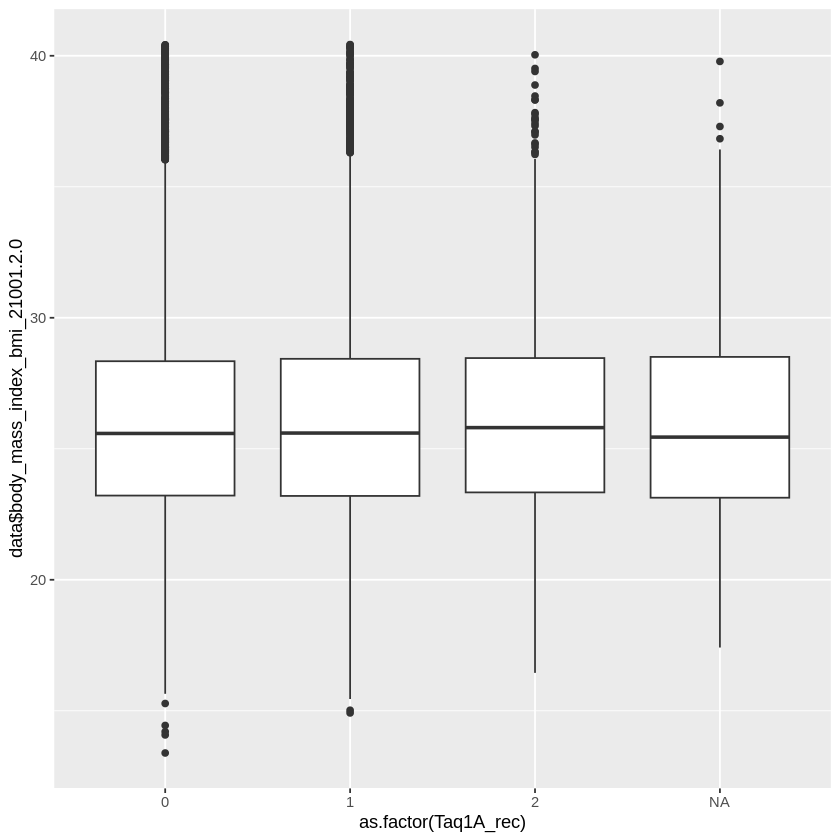

In [43]:
ggplot(data=data, aes(x=as.factor(Taq1A_rec), y=data$`body_mass_index_bmi_21001.2.0`)) + geom_boxplot()

# Save tables

In [131]:
save_as_docx(tab_corr, tab_cortex, tab_subcortex, tab_wm, tab_dti, tab_noddi, tab_cog, tab_premed, tab_med,
             path='/dagher/dagher11/filip/UPF/tables/All_tables_June.docx')

# Plotting

In [91]:
common_theme <- theme(
  axis.text.x = element_text(size = 12),
  axis.text.y = element_text(size = 12),
)

In [36]:
png('/dagher/dagher11/filip/UPF/figures/Figure2_old.png', height=3000, width=6000, res=300)
ggarrange(forest_CTSA,
          ggarrange(forest_subvol, forest_WM, forest_subDTI, forest_subNODDI, 
                    labels=c('b','c','d','e'),  font.label = list(size = 15, color = "black"), ncol=2, nrow=2,
                   widths=c(1.5,2)),
          labels = c("a", ""), font.label = list(size = 15, color = "black"),
          ncol = 2, nrow = 1, widths=c(1,2)) +
          theme(plot.margin = margin(0,0,0,0, "cm"))
dev.off()

png 
  2

In [93]:
png('/dagher/dagher11/filip/UPF/figures/Figure2.png', height=3000, width=5000, res=300)
ggarrange(forest_CTSA + common_theme,
          ggarrange(forest_subvol + common_theme, forest_WM + common_theme, 
                    labels=c('b','c'),  font.label = list(size = 15, color = "black"), ncol=1, nrow=2),
          labels = c("a", ""), font.label = list(size = 15, color = "black"),
          ncol = 2, nrow = 1, widths=c(1.2,1)) +
          theme(plot.margin = margin(0,0,0,0, "cm"))
dev.off()

png 
  2

In [101]:
png('/dagher/dagher11/filip/UPF/figures/Figure3.png', height=1700, width=5000, res=300)
ggarrange(forest_subDTI + common_theme, forest_subNODDI + common_theme,
          labels = c("a", "b"), font.label = list(size = 15, color = "black"),
          ncol = 2, nrow = 1, widths=c(1.2,1)) +
          theme(plot.margin = margin(0,0,0,0, "cm"))
dev.off()

png 
  2